# Inspecting distributions peptides across files/tasks

## Setup

In [2]:
import pandas as pd
from utils.preprocess import *

In [3]:
import seaborn as sns

In [4]:
merge_psm_files('../../massivekb_dataset/results/test_data_calibrated', 'output/test_data_calibrated_merged.tsv',['filename','level 1','scan','RT','sequence','mztab_filename','task_id','iRT'])

All TSV files have been merged into output/test_data_calibrated_merged.tsv


In [5]:
df = pd.read_csv('output/test_data_calibrated_merged.tsv', sep='\t',index_col=False)

In [6]:
df.head()

,filename,level 1,scan,RT,sequence,mztab_filename,task_id,iRT
0,PTSS4201SN16441.mzML,30,20919,58.286275,PVTVVVLK,Library_Augmentation_Search_-_Combined_Single_...,04fe276206f54b3c8f81798ea92aa6e3,54.460793
1,PTSS4201SN16441.mzML,255,16551,50.065410,SASSSAAGSPGGLTSLQQQK,Library_Augmentation_Search_-_Combined_Single_...,04fe276206f54b3c8f81798ea92aa6e3,41.154703
2,PTSS4201SN16441.mzML,275,28064,71.616320,LRNDLLNIIR,Library_Augmentation_Search_-_Combined_Single_...,04fe276206f54b3c8f81798ea92aa6e3,76.036476
3,PTSS4201SN16441.mzML,299,17303,51.487835,MGPSRLVRGPR,Library_Augmentation_Search_-_Combined_Single_...,04fe276206f54b3c8f81798ea92aa6e3,43.457005
4,PTSS4201SN16441.mzML,307,44559,103.201400,LQPMLLEMER,Library_Augmentation_Search_-_Combined_Single_...,04fe276206f54b3c8f81798ea92aa6e3,127.159311


## File level

### Check how many times a sequence appears in each file

In [7]:
overlap_in_file = df.groupby(['sequence','filename']).size().reset_index(name='count')
overlap_in_file

,sequence,filename,count
0,AAAAAAAAAAAAAAAAG,Bibo_20130621_CHS_IEF_3-10linear_24slices_15.m...,1
1,AAAAAAAAAAAAAAAAG,Bibo_20130621_CHS_IEF_3-10linear_24slices_16.m...,1
2,AAAAAAAAAAAAAAAAG,Bibo_20130621_CHS_IEF_3-10linear_24slices_20.m...,1
3,AAAAAAAAAAAAAAAALAAAAGGGR,20120506_EXQ5_SaDe_SA_TRR71_02.mzML,1
4,AAAAAAAAAAAAAAAALAAAAGGGR,20150320_QE4_UPLC7_KBS_SCL_SA_ARG_MET_exp2_Gnd...,1
...,...,...,...
4746830,YYYYHR,Kermit_201408029_YP_S_BCVALID_B23M_6.mzXML,1
4746831,YYYYHR,Kermit_20140807_YP_SA_BCVALID_B19M_5.mzXML,1
4746832,YYYYHR,Kermit_20140807_YP_SA_BCVALID_B19T_5.mzXML,1
4746833,YYYYWHLR,20130502_EXQ6_SaDe_SA_76_05.mzML,1


In [8]:
overlap_in_file['count'].describe()

count    4.746835e+06
mean     1.730610e+00
std      2.749429e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      6.100000e+02
Name: count, dtype: float64

In [9]:
print(len(overlap_in_file[overlap_in_file['count']>1]))
overlap_in_file[overlap_in_file['count']>1]

1528889


,sequence,filename,count
12,AAAAAAAAAAAAAAAAVPR,20110612_Q2_TaGe_SA_BC1_2.mzML,5
16,AAAAAAAAAAAAAAAGAGAGAK,131119_Sunil_Prot_BrainAmine_ACentroid_04.mzML,2
17,AAAAAAAAAAAAAAAGAGAGAK,131121_Sunil_Prot_BrainAmine_AProfile_04.mzML,2
22,AAAAAAAAAAAAAAAGAGAGAK,150218_Rho0_143B_8_a.mzML,2
24,AAAAAAAAAAAAAAAGAGAGAK,20110616_EXQ1_TaGe_SA_BC10_1.mzML,2
...,...,...,...
4746818,YYYYHR,Animal_20140807_YP_SA_BCVALID_B24M_3.mzXML,3
4746822,YYYYHR,Grobi_20130312_CHS_IEF100_20130309_3-10linear_...,2
4746826,YYYYHR,Kermit_201408012_YP_SA_BCVALID_B26T_6.mzXML,2
4746827,YYYYHR,Kermit_20140801_YP_SA_BCVALID_A35T_6.mzXML,2


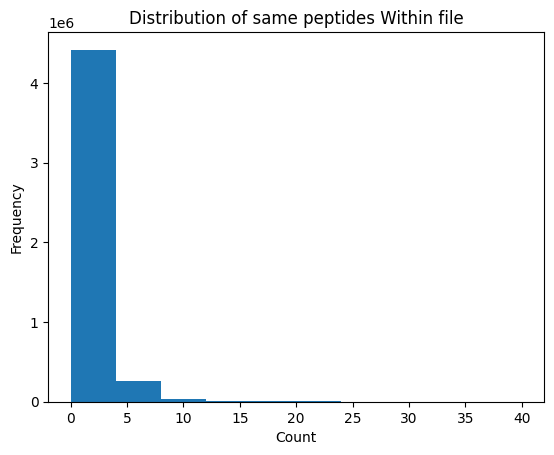

In [10]:
overlap_in_file["count"].plot.hist(range=(0, 40))
plt.title("Distribution of same peptides Within file")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

### Check in how many different files a sequence exists

In [8]:
overlap_across_file = df.groupby('sequence')['filename'].nunique().reset_index(name='count')
overlap_across_file

,sequence,count
0,AAAAAAAAAAAAAAAAG,3
1,AAAAAAAAAAAAAAAALAAAAGGGR,8
2,AAAAAAAAAAAAAAAASAGGK,1
3,AAAAAAAAAAAAAAAAVPR,1
4,AAAAAAAAAAAAAAAGA,3
...,...,...
485418,YYYWAVNPQDR,12
485419,YYYYER,7
485420,YYYYHR,107
485421,YYYYWHLR,1


In [12]:
overlap_across_file['count'].describe()

count    485423.000000
mean          9.778760
std          22.063238
min           1.000000
25%           1.000000
50%           2.000000
75%           8.000000
max         573.000000
Name: count, dtype: float64

In [13]:
print(len(overlap_across_file[overlap_across_file['count']>1]))
overlap_across_file[overlap_across_file['count']>1]

309046


,sequence,count
0,AAAAAAAAAAAAAAAAG,3
1,AAAAAAAAAAAAAAAALAAAAGGGR,8
4,AAAAAAAAAAAAAAAGA,3
5,AAAAAAAAAAAAAAAGAGAGAK,43
6,AAAAAAAAAAAAAAASGFAYPGTSER,17
...,...,...
485414,YYYVPADFVEYEKNNPGSQK,2
485417,YYYVQNVYTPVDEHVYPDHR,7
485418,YYYWAVNPQDR,12
485419,YYYYER,7


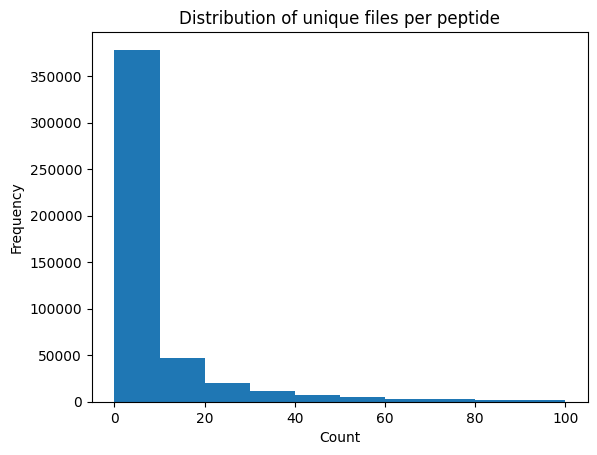

In [14]:
overlap_across_file["count"].plot.hist(range=(0, 100))
plt.title("Distribution of unique files per peptide")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

### Check if peptides that exist in a lot of unique files exist a lot in the same files

In [15]:
lot_of_unique_files_peptides = overlap_across_file[overlap_across_file['count']>200]['sequence']

In [16]:
filtered_df = df[df['sequence'].isin(lot_of_unique_files_peptides)]

In [17]:
overlap_in_file_filtered = filtered_df.groupby(['sequence','filename']).size().reset_index(name='num')
overlap_in_file_filtered

,sequence,filename,num
0,AAGTLYTYPENWR,141107_Rho_LSII_143B_SII_1D.mzML,1
1,AAGTLYTYPENWR,141107_Rho_LSI_143B_SI_1D.mzML,2
2,AAGTLYTYPENWR,141107_Rho_SII_143B_LSII_1D.mzML,2
3,AAGTLYTYPENWR,141113_Rho_SI_143B_LSI_pH11.mzML,2
4,AAGTLYTYPENWR,141113_Rho_SI_143B_LSI_pH6.mzML,1
...,...,...,...
226246,YYVTIIDAPGHR,liver_1_9.mzML,2
226247,YYVTIIDAPGHR,liver_2_17.mzML,2
226248,YYVTIIDAPGHR,liver_2_8.mzML,113
226249,YYVTIIDAPGHR,liver_3_16.mzML,1


In [18]:
overlap_in_file_filtered.describe()

,num
count,226251.000000
mean,3.642128
std,8.322836
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,610.000000


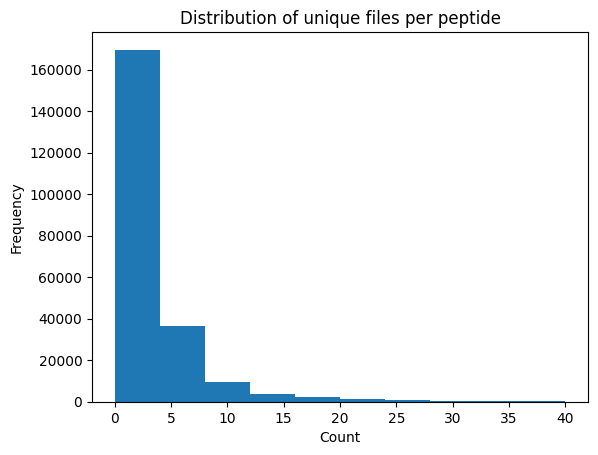

In [19]:
overlap_in_file_filtered["num"].plot.hist(range=(0, 40))
plt.title("Distribution of unique files per peptide")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

## Task level

### Check how many times a sequence exists in each task

In [20]:
overlap_in_task = df.groupby(['sequence','task_id']).size().reset_index(name='count')
overlap_in_task

,sequence,task_id,count
0,AAAAAAAAAAAAAAAAG,13cee24c8c1840e282973a89089def57,2
1,AAAAAAAAAAAAAAAAG,7c6c2e49218a47d790a225b4ff398e1a,1
2,AAAAAAAAAAAAAAAALAAAAGGGR,173516dbe1a1405290fa01276cc084f1,1
3,AAAAAAAAAAAAAAAALAAAAGGGR,19e47dbbcc1547fd9a98db3fdcc42ba8,4
4,AAAAAAAAAAAAAAAALAAAAGGGR,1cf85d7c719a4edaae2f97557dcfb42c,1
...,...,...,...
2038886,YYYYHR,9e99e616f94442ba89f75efa585a0f34,10
2038887,YYYYHR,b0264e7cf94c4e338f806a5553962043,21
2038888,YYYYHR,cbc91ef5f2fc46e293215778b6996bbd,7
2038889,YYYYWHLR,4c3f42bf02f045f39c01ccbde282e5ac,1


In [21]:
overlap_in_task['count'].describe()

count    2.038891e+06
mean     4.029112e+00
std      9.936472e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      1.638000e+03
Name: count, dtype: float64

In [22]:
print(len(overlap_in_task[overlap_in_task['count']>1]))
overlap_in_task[overlap_in_task['count']>1]

1164102


,sequence,task_id,count
0,AAAAAAAAAAAAAAAAG,13cee24c8c1840e282973a89089def57,2
3,AAAAAAAAAAAAAAAALAAAAGGGR,19e47dbbcc1547fd9a98db3fdcc42ba8,4
5,AAAAAAAAAAAAAAAALAAAAGGGR,80a5f36d13e444c68f04ba5ccb6d936c,2
7,AAAAAAAAAAAAAAAAVPR,9e99e616f94442ba89f75efa585a0f34,5
8,AAAAAAAAAAAAAAAGA,13cee24c8c1840e282973a89089def57,2
...,...,...,...
2038884,YYYYHR,8fe578b601044a93a95e0567720cee0c,9
2038885,YYYYHR,99f158dc32c54f7eb35af706b17c981c,2
2038886,YYYYHR,9e99e616f94442ba89f75efa585a0f34,10
2038887,YYYYHR,b0264e7cf94c4e338f806a5553962043,21


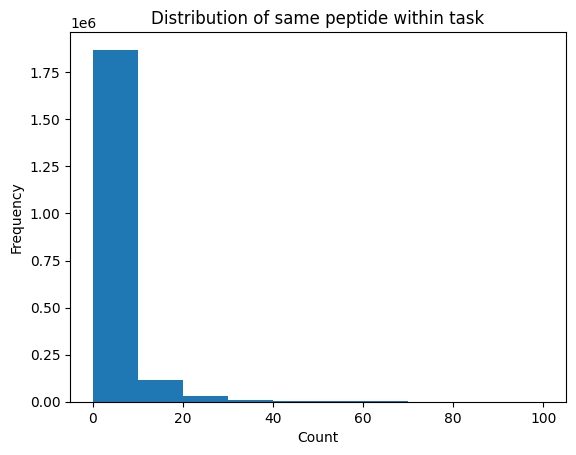

In [23]:
overlap_in_task["count"].plot.hist(range=(0, 100))
plt.title("Distribution of same peptide within task")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

### Check in how many different tasks a sequence exists

In [24]:
overlap_across_task = df.groupby('sequence')['task_id'].nunique().reset_index(name='count')
overlap_across_task

,sequence,count
0,AAAAAAAAAAAAAAAAG,2
1,AAAAAAAAAAAAAAAALAAAAGGGR,4
2,AAAAAAAAAAAAAAAASAGGK,1
3,AAAAAAAAAAAAAAAAVPR,1
4,AAAAAAAAAAAAAAAGA,2
...,...,...
485418,YYYWAVNPQDR,9
485419,YYYYER,5
485420,YYYYHR,18
485421,YYYYWHLR,1


In [25]:
overlap_across_task['count'].describe()

count    485423.000000
mean          4.200236
std           5.496976
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max          39.000000
Name: count, dtype: float64

In [26]:
print(len(overlap_across_task[overlap_across_task['count']>1]))
overlap_across_task[overlap_across_task['count']>1]

276705


,sequence,count
0,AAAAAAAAAAAAAAAAG,2
1,AAAAAAAAAAAAAAAALAAAAGGGR,4
4,AAAAAAAAAAAAAAAGA,2
5,AAAAAAAAAAAAAAAGAGAGAK,22
6,AAAAAAAAAAAAAAASGFAYPGTSER,3
...,...,...
485414,YYYVPADFVEYEKNNPGSQK,2
485417,YYYVQNVYTPVDEHVYPDHR,5
485418,YYYWAVNPQDR,9
485419,YYYYER,5


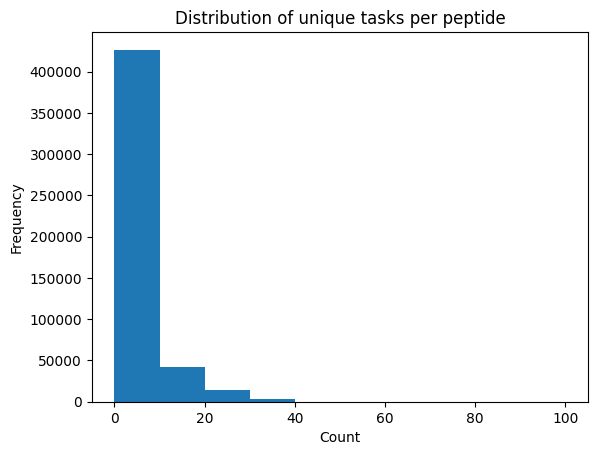

In [27]:
overlap_across_task["count"].plot.hist(range=(0, 100))
plt.title("Distribution of unique tasks per peptide")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

# Looking at variation retention times

## Mean absolute deviation

In [28]:
def mean_absolute_deviation(series,threshhold):
    if len(series)<threshhold:
        return None
    return (series - series.mean()).abs().mean()

## File level

### Within same file

In [29]:
pool_peptide_samples = df.groupby(['sequence', 'filename'])['iRT'].apply(lambda x: mean_absolute_deviation(x, 2))

In [30]:
pool_peptide_samples2 = pool_peptide_samples.dropna()

In [31]:
pool_peptide_samples2.describe()

count    1.528889e+06
mean     2.560119e+00
std      4.982801e+00
min      0.000000e+00
25%      9.627376e-02
50%      2.926051e-01
75%      2.354733e+00
max      1.040171e+02
Name: iRT, dtype: float64

### Across files

In [32]:
pool_peptide_samples_out = df.groupby(['sequence'])['iRT'].apply(lambda x: mean_absolute_deviation(x, 2))

In [33]:
pool_peptide_out2 = pool_peptide_samples_out.dropna()

In [34]:
pool_peptide_out2.describe()

count    327271.000000
mean          4.133068
std           4.700680
min           0.000000
25%           1.053039
50%           2.864715
75%           5.573003
max         123.688260
Name: iRT, dtype: float64

## Interesting peptides

In [35]:
def select_interesting_peptides(overlap_across_file,overlap_in_file,across_file,inside_file,inside_file2,amount):
    filter1 = overlap_across_file[overlap_across_file['count']>across_file]['sequence']
    filter2 = overlap_in_file[overlap_in_file['count']>inside_file]
    filter2 = filter2.groupby('sequence').size().reset_index(name='count')
    filter2 = filter2[filter2['count']>=inside_file2]['sequence']
    selected_peptides = pd.Series(list(set(filter1) & set(filter2))).sample(n=amount)
    return selected_peptides

def select_most_file_overlap_peptides(overlap_across_file):
    return overlap_across_file.nlargest(10, 'count')
    


In [10]:
def convert_dictionary_plotting(dictionary):
    # Convert the group_by_file dictionary into a list of dictionaries
    converted_dictionary = []
    for (sequence, value), iRTs in dictionary.items():
        # Check if the sequence is already in the result list
        sequence_entry = next((item for item in converted_dictionary if item['sequence'] == sequence), None)
        if not sequence_entry:
            # If not, add it
            sequence_entry = {'sequence': sequence, "combined": {}}
            converted_dictionary.append(sequence_entry)
        # Add the experiment and its iRT list to the sequence entry
        sequence_entry["combined"][value] = iRTs
    return converted_dictionary

In [11]:
def plot_kde_dictionary(dictionary,threshhold,legend=None):
    for entry in dictionary:
        sequence = entry['sequence']
        combined = entry["combined"]
        plt.figure(figsize=(8, 6))
        
        for key, values in combined.items():
            if len(values) >= threshhold:  # KDE requires at least two data points
                label = f"{key} (n={len(values)})"  # Label includes the number of data points
                sns.kdeplot(values, label=label, fill=False)
        
        plt.xlabel("Retention Time")
        plt.ylabel("Density")
        if legend:
            plt.legend(title=legend, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.title(f"KDE Plot for Sequence: {sequence}")
        plt.show()

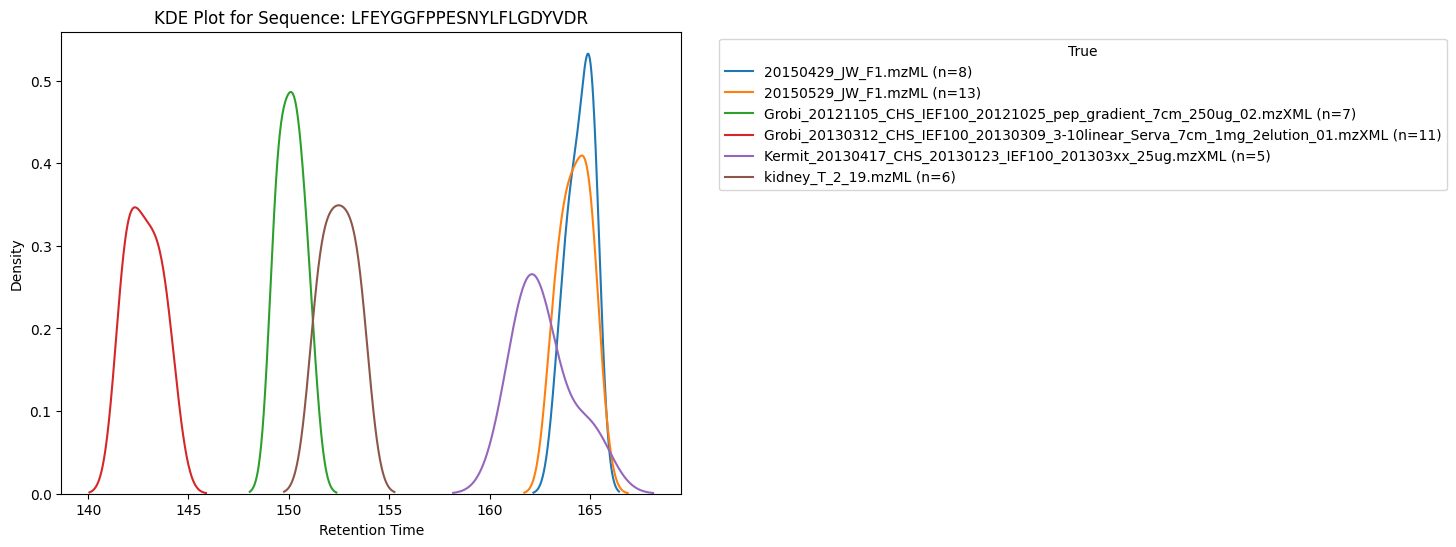

In [62]:
interesting_peptides = select_interesting_peptides(overlap_across_file,overlap_in_file,20,5,5,1)
selected_sequences = df[df['sequence'].isin(interesting_peptides)]
group_by_file = selected_sequences.groupby(['sequence', 'filename'])['iRT'].apply(list).to_dict()
dic_files = convert_dictionary_plotting(group_by_file)
plot_kde_dictionary(dic_files,5,True)

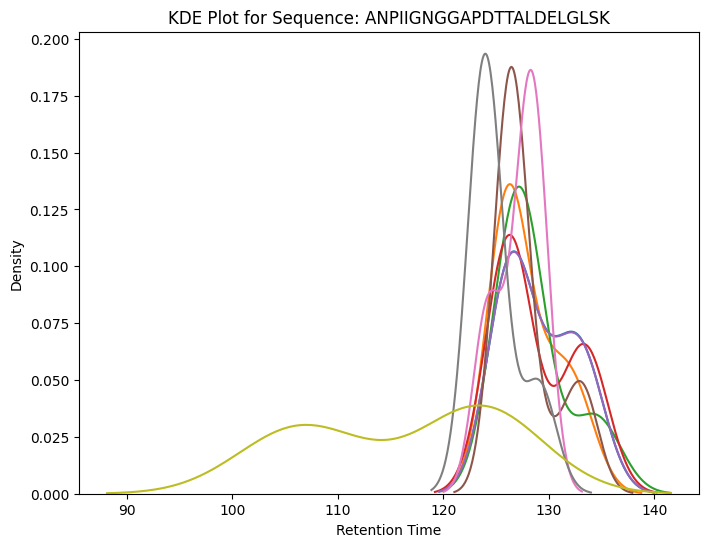

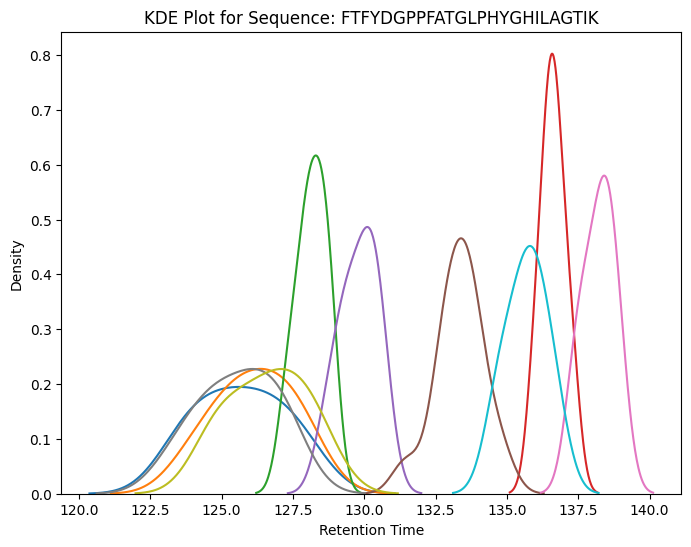

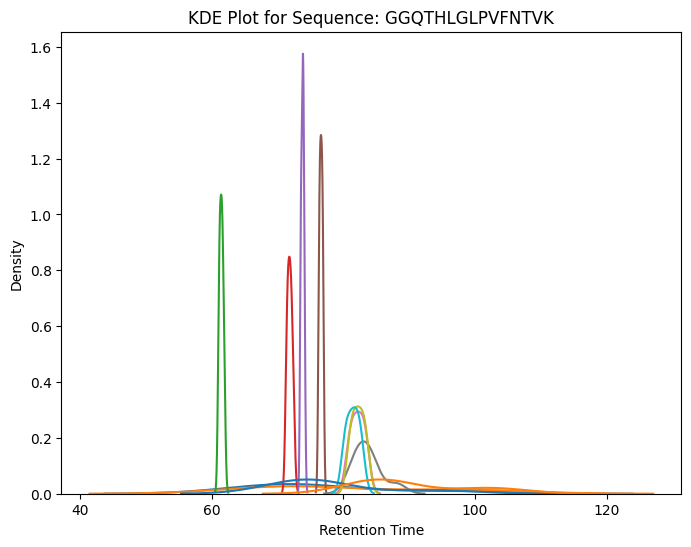

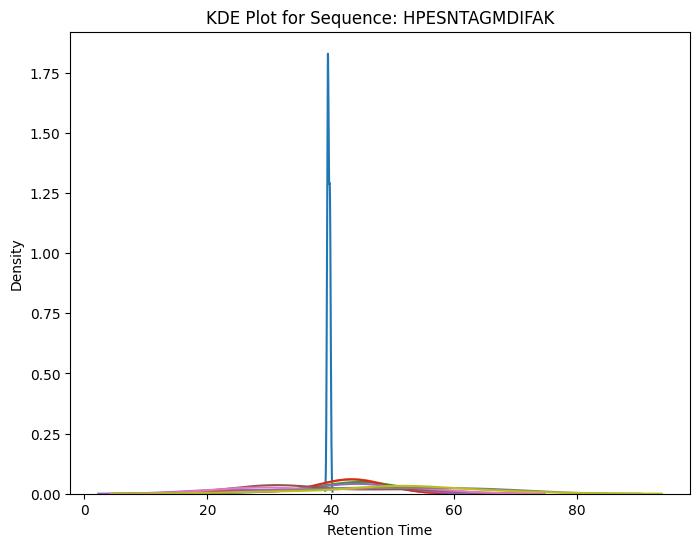

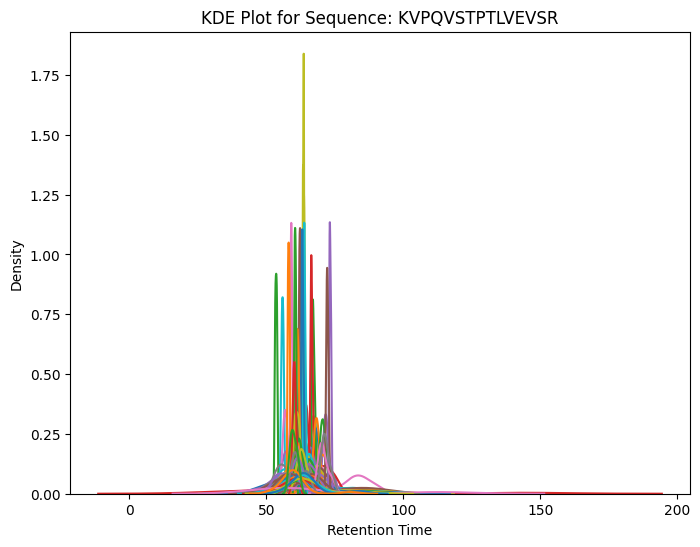

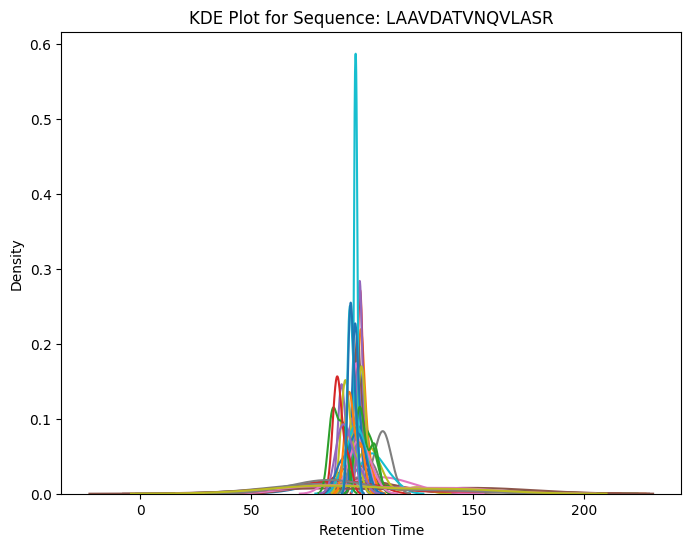

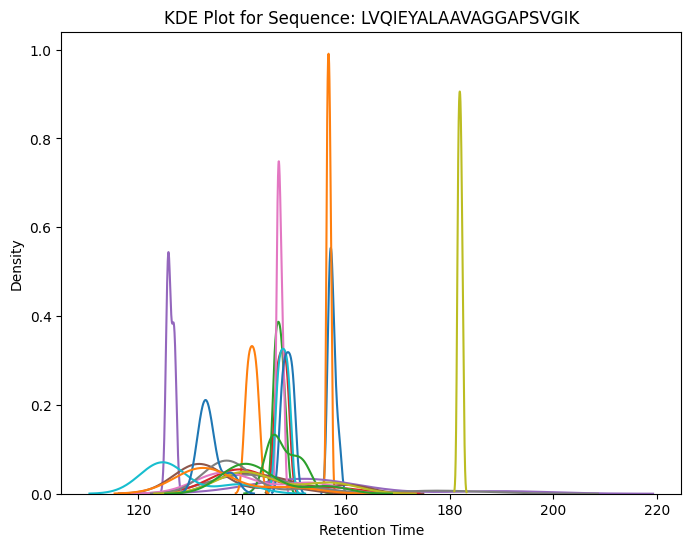

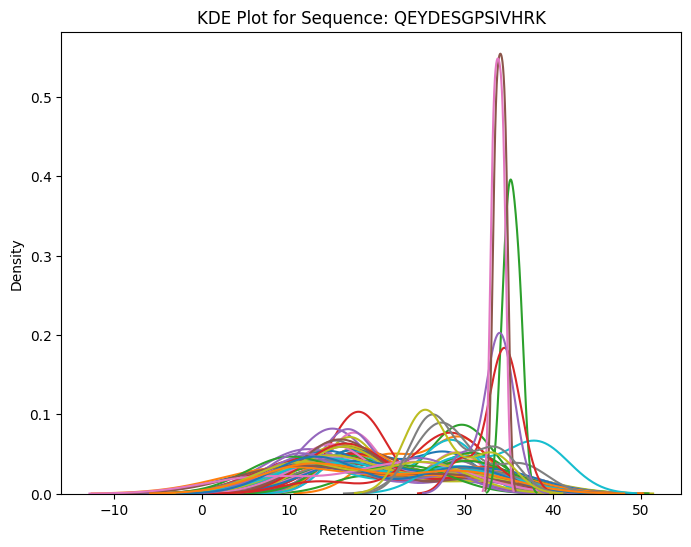

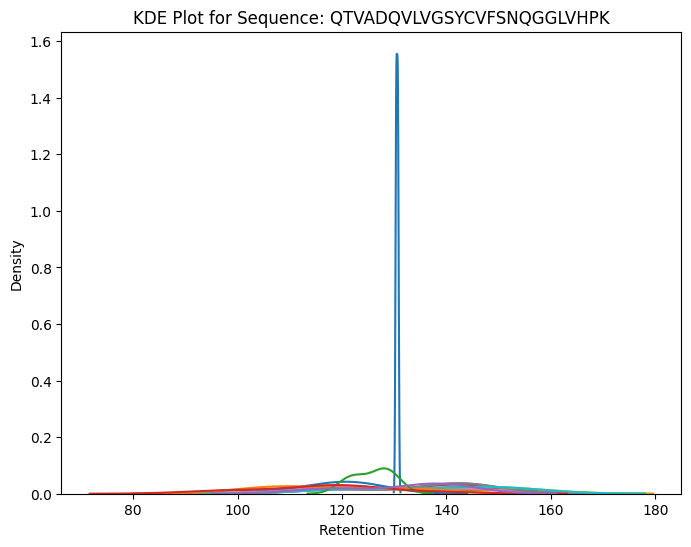

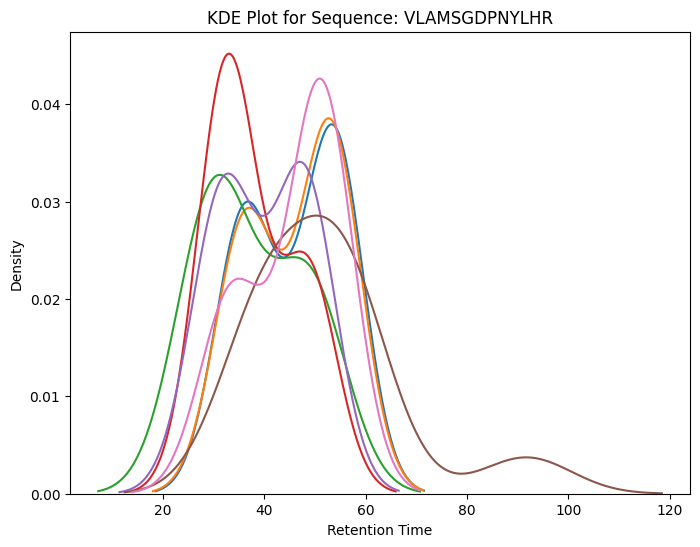

In [116]:
interesting_peptides = select_interesting_peptides(overlap_across_file,overlap_in_file,20,5,5,10)
selected_sequences = df[df['sequence'].isin(interesting_peptides)]
group_by_file = selected_sequences.groupby(['sequence', 'filename'])['iRT'].apply(list).to_dict()
dic_files = convert_dictionary_plotting(group_by_file)
plot_kde_dictionary(dic_files,5,False)

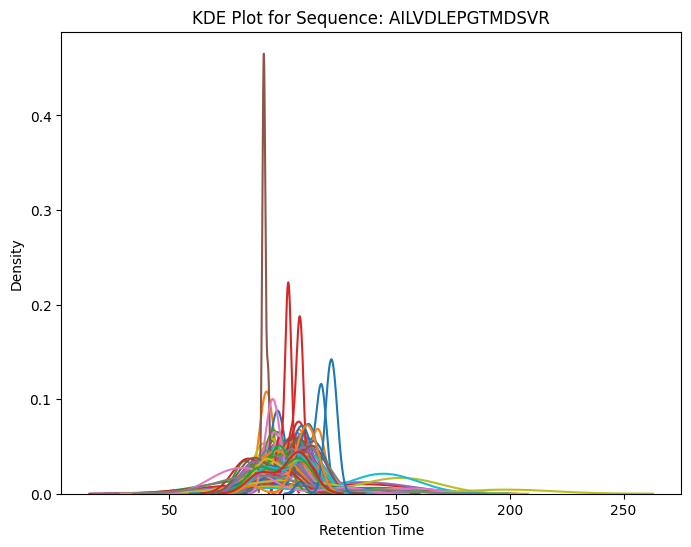

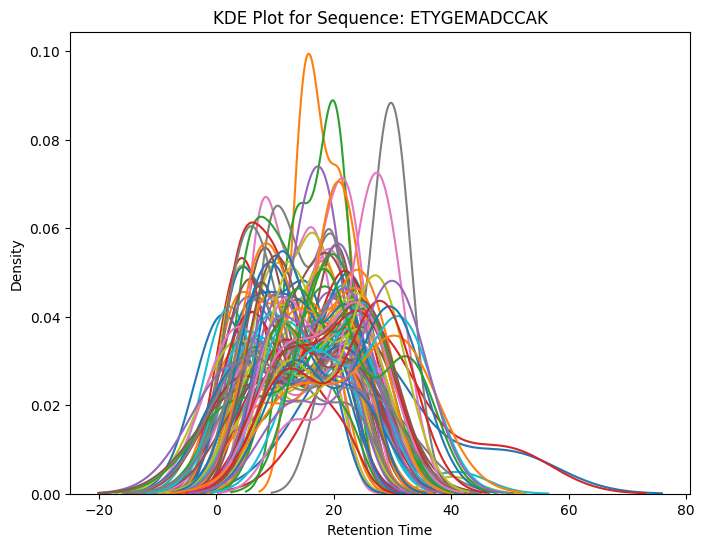

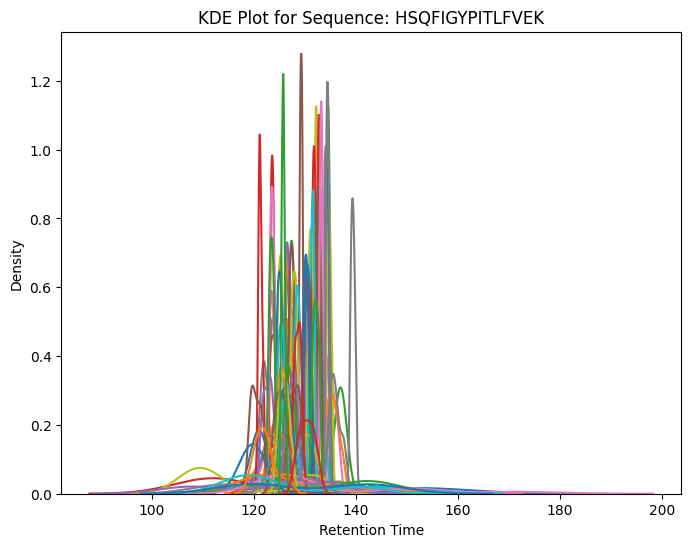

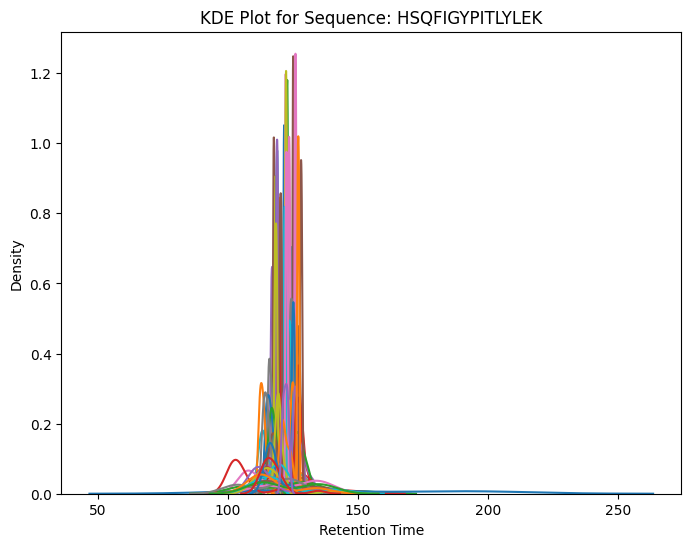

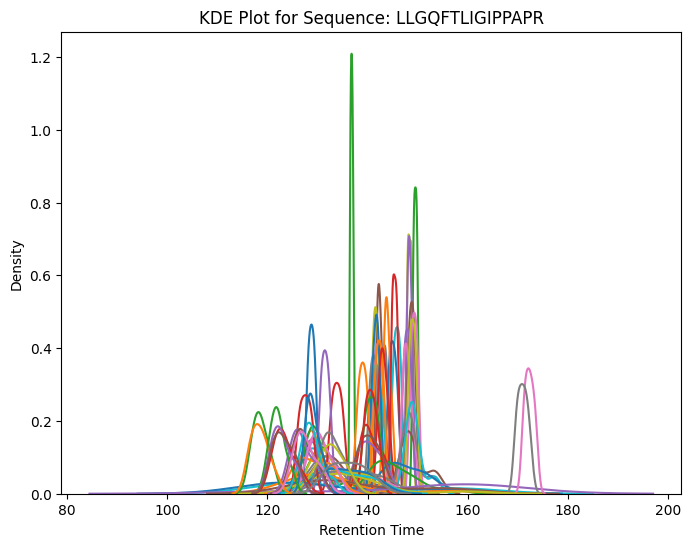

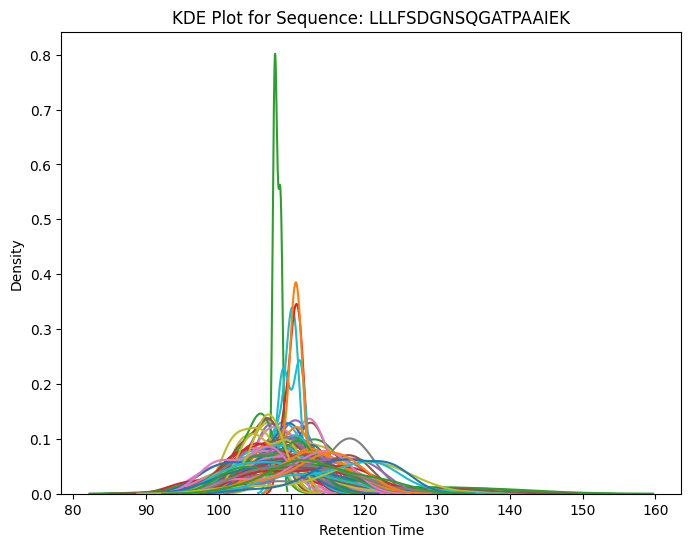

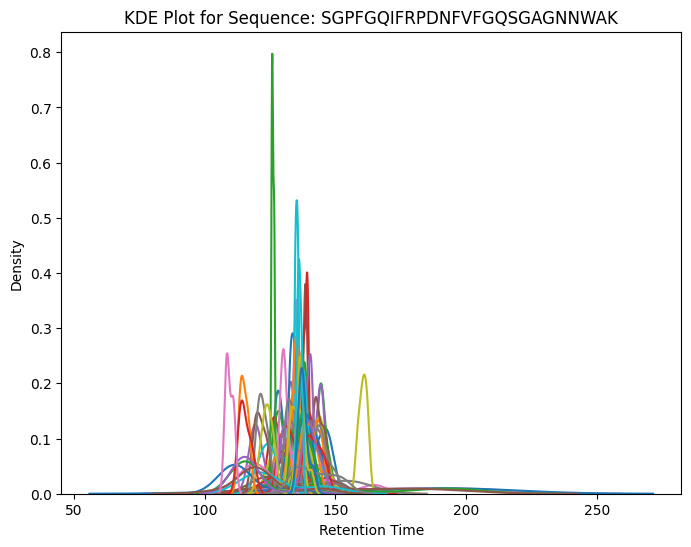

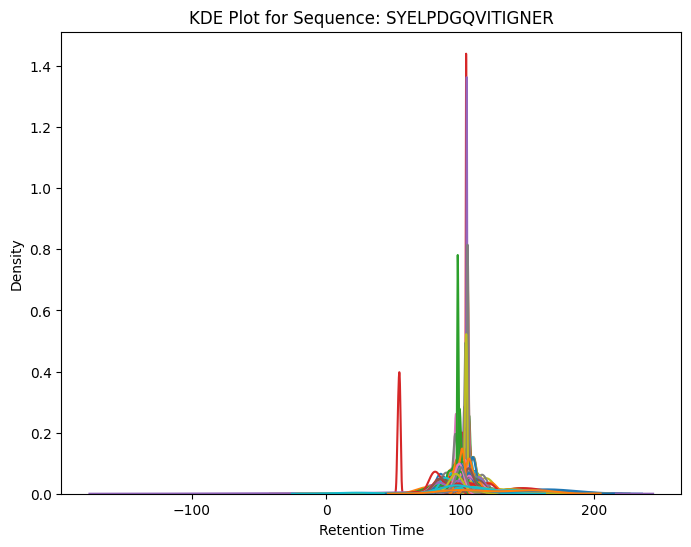

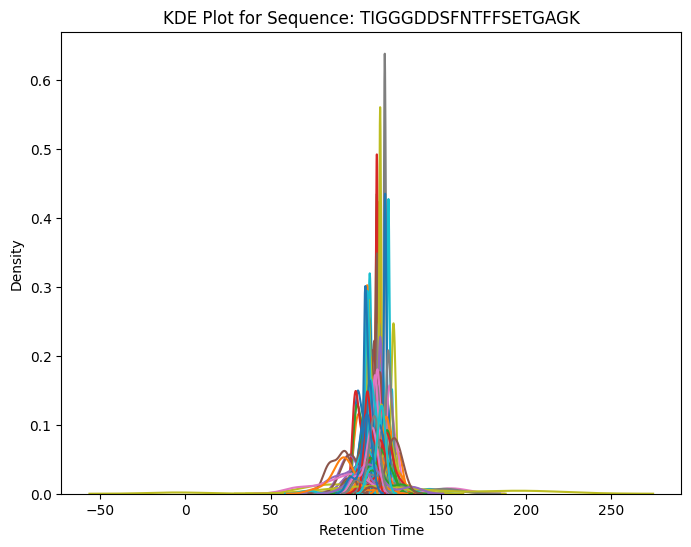

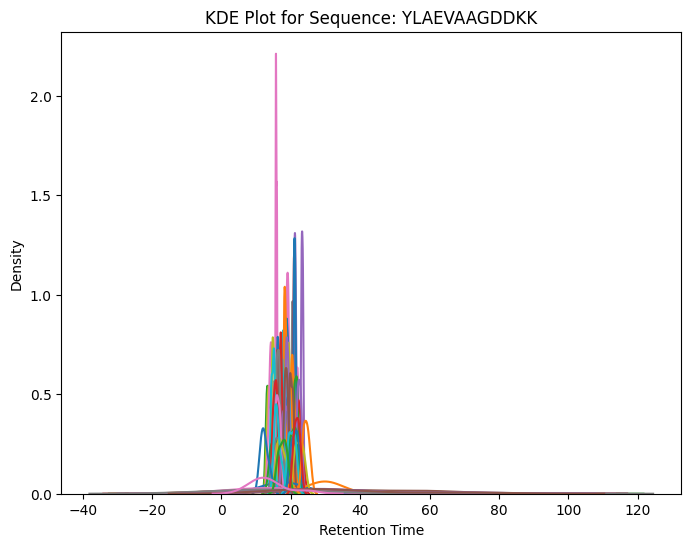

In [117]:
interesting_peptides = select_interesting_peptides(overlap_across_file,overlap_in_file,50,5,50,10)
selected_sequences = df[df['sequence'].isin(interesting_peptides)]
group_by_file = selected_sequences.groupby(['sequence', 'filename'])['iRT'].apply(list).to_dict()
dic_files = convert_dictionary_plotting(group_by_file)
plot_kde_dictionary(dic_files,5,False)